In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
# Read data from CSV file
df = pd.read_csv('/content/auto-mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Rename column
df.rename(columns={'car name':'car_name'}, inplace=True)

In [ ]:
# Check DataFrame info and indentify types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Identify if all horsepower data is numeric in order to convert it to integer data type
df.horsepower.apply(lambda x: x.isnumeric()).all()

False

In [ ]:
# Check rows with quality issues
df.loc[np.where(df.horsepower.apply(lambda x: x.isnumeric()) == False)[0]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Drop rows with '?' sign
df.drop(np.where(df.horsepower.apply(lambda x: x.isnumeric()) == False)[0], inplace=True)

In [ ]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Change data type of 'horsepower' column
df['horsepower'] = df.horsepower.astype('int')

# Replace values of 'origin' column with text values
df['origin'] = df.origin.replace({1:'India', 2:'Germany', 3:'USA'})

In [ ]:
# Summary statistics of numerical columns
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
# Summary statistics of categorical column
df.describe(include='O')

,origin,car_name
count,392,392
unique,3,301
top,India,amc matador
freq,245,5


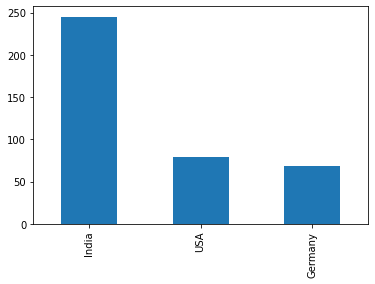

In [ ]:
# Plot result of value counts
df.origin.value_counts().plot.bar()

In [ ]:
# Create new variables
df['displacement_per_unit'] = df.displacement / df.horsepower
df['weight_per_cylinder'] = df.weight / df.cylinders
df['acceleration_per_unit_power'] =  df.acceleration / df.horsepower

In [ ]:
# Open new dataset
df_mkt = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

In [ ]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df_mkt.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [ ]:
# Select subset of columns from the dataset
df_mkt[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [ ]:
# Select subset of columns from the dataset using .loc[] method
df_mkt.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [ ]:
# Subset of original dataframe from index 50 to 300 for the last nine columns
df_mkt.iloc[50:301, -9:]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
50,0,0,0,0,0,0,3,11,0
51,0,0,0,0,0,0,3,11,0
52,0,0,0,0,0,0,3,11,0
53,1,0,0,1,0,0,3,11,1
54,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,3,11,0
297,0,0,0,0,0,0,3,11,0
298,0,0,0,0,0,0,3,11,0
299,0,1,0,0,0,0,3,11,0


In [ ]:
# Open new dataset
df_landslides = pd.read_csv('/content/landslides.csv')

In [ ]:
df_landslides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [ ]:
# Indentify rows with missing values
df_landslides.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [ ]:
# Drop rows where the date column has missing values
df_landslides.drop(df_landslides[df_landslides.date.isna()].index, inplace=True)

In [ ]:
# Fill missing fatalities with the mean/median of the column
print(f'Skewness: ',np.round(df_landslides.fatalities.agg('skew'), 4))
df_landslides.fatalities.fillna(df_landslides.fatalities.median(), inplace=True)

Skewness:  21.4964


In [ ]:
# Fill missing values in the 'time' column with a specific value
df_landslides.time.fillna('12:06', inplace=True)

In [ ]:
# What is the most landslide-prince month in a province or state?
df_landslides['date'] = pd.to_datetime(df_landslides.date)
fatalities_mask = (df_landslides.fatalities == 1)
df_landslides.loc[fatalities_mask].date.dt.month.value_counts()

11    11
10     7
9      5
5      5
8      4
7      4
12     4
6      3
4      2
3      2
1      1
2      1
Name: date, dtype: int64

In [ ]:
# Parse dates types of the column by converting theminto Morning, Afternoon, Evening and Night clases
df_landslides.time.value_counts()

12:06            1064
Night              97
Morning            87
Afternoon          58
Early morning      36
                 ... 
1:13                1
9:40:00             1
11:50:00            1
                    1
21:06               1
Name: time, Length: 160, dtype: int64

In [ ]:
def format_type(values):
  if ':' in values.lower():
    if int(values.split(':')[0]) >= 12 and int(values.split(':')[0]) < 18:
      values = 'Afternoon'
    elif int(values.split(':')[0]) < 12:
      values = 'Morning'
    elif int(values.split(':')[0]) >= 18:
      values = 'Night'
    else:
      values = 'Afternoon'
  elif 'evening' in values.lower():
    values = 'Evening'
  elif 'overnight' in values.lower():
    values = 'Overnight'
  else:
    values
  return values

In [ ]:
df_landslides.time.apply(format_type).unique() #value_counts()

array(['Night', 'Afternoon', 'Early morning', 'Morning', 'Overnight',
       'Late morning', 'Evening', 'Late night', 'Before dawn',
       'Late afternoon', ' ', '****', 'Unknown'], dtype=object)

In [ ]:
# Write conditional statements to filter rows
# Extract cutomers who are married
df_mkt[df_mkt.Marital_Status == 'Married'].Marital_Status.unique()

array(['Married'], dtype=object)

In [ ]:
df_mkt.loc[df_mkt.Marital_Status.isin(['Married'])].Marital_Status.unique()

array(['Married'], dtype=object)

In [ ]:
# Extract customers without a partner and who are born after 1990
masked_df = df_mkt.loc[(df_mkt.Year_Birth > 1990) & (~df_mkt.Marital_Status.isin(['Married', 'Together']))]
masked_df.Marital_Status.unique(), masked_df.Year_Birth.unique()

(array(['Single', 'Absurd'], dtype=object),
 array([1991, 1992, 1993, 1995, 1994]))

In [ ]:
# Using bitwise operators - Extract customers who buy online
active_customers = df_mkt.loc[(df_mkt.NumDealsPurchases > 5) | (df_mkt.NumWebPurchases > 5)].ID.unique()

df_mkt['Client_Status'] = df_mkt.ID.apply(lambda x: 'Active' if x in active_customers else 'Inactive')
df_mkt['Client_Status'].value_counts()

Inactive    1548
Active       692
Name: Client_Status, dtype: int64

In [ ]:
# Filtering to find target demography - Extract customers froma specific demographic
education = df_mkt.Education.isin(['Graduation', 'PhD', 'Master'])
income = df_mkt.Income > 65000
children_in_home = df_mkt.Kidhome == 0

target_demo_df = df_mkt.loc[education & income & children_in_home]

target_demo_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Client_Status
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,Active
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,0,0,1,1,0,0,3,11,1,Active
18,6565,1949,Master,Married,76995.0,0,1,28-03-2013,91,1012,...,0,0,0,1,0,0,3,11,0,Active
23,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,0,0,0,0,0,0,3,11,0,Active
29,1966,1965,PhD,Married,84618.0,0,0,22-11-2013,96,684,...,0,0,1,0,0,0,3,11,0,Active


In [ ]:
# Group and aggregate data - Study groups of customers based on purchases (avg amout of products purchased based on marital status)
df_mkt.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
Single,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167
Together,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828
Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234
YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000


In [ ]:
# Group and aggregate multiple columns - Extract income of customer groups
df_mkt.groupby(['Education', 'Marital_Status']).Income.agg(['median', 'mean'])

median          mean
Education  Marital_Status                       
2n Cycle   Divorced        49118.0  49395.130435
           Married         46462.5  46201.100000
           Single          48668.5  53673.944444
           Together        45774.0  44736.410714
           Widow           47682.0  51392.200000
Basic      Divorced         9548.0   9548.000000
           Married         22352.0  21960.500000
           Single          16383.0  18238.666667
           Together        23179.0  21240.071429
           Widow           22123.0  22123.000000
Graduation Absurd          79244.0  79244.000000
           Alone           34176.0  34176.000000
           Divorced        55635.0  54526.042017
           Married         50737.0  50800.258741
           Single          49973.5  51322.182927
           Together        53977.0  55758.480702
           Widow           58275.0  54976.657143
Master     Absurd          65487.0  65487.000000
           Alone           61331.0  61331.000000
           Divorced        49476.0  50331.945946
           Married         53088.5  53286.028986
           Single          49494.0  53530.560000
           Together        49736.0  52109.009804
           Widow           51529.0  58401.545455
PhD        Alone           35860.0  35860.000000
           Divorced        50613.5  53096.615385
           Married         57081.5  58138.031579
           Single          50198.0  53314.614583
           Together        56756.0  56041.422414
           Widow           57032.0  60288.083333
           YOLO            48432.0  48432.000000

In [ ]:
def top_5(df, n=5, column='NumWebPurchases'):
  return df.sort_values(by=column)[-n:]

In [ ]:
# Apply a custom aggregation function - Find top purchasers among customer groups
df_mkt.groupby(['Education']).apply(top_5)[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Education                                                                  
2n Cycle   67                    1               11                   10   
           1507                  6               11                    8   
           2171                  1               11                    3   
           1119                  5               11                    1   
           797                   3               11                    4   
Basic      1324                  2                3                    0   
           1220                  3                3                    1   
           1284                  2                4                    2   
           502                   1                4                    1   
           2013                  6               11                    2   
Graduation 924                   1               11                    4   
           219                   2               11                    4   
           681                   1               11                    5   
           1975                  0               25                    0   
           27                    0               27                    0   
Master     992                   5               10                    1   
           2028                  4               10                    5   
           131                   5               11                    1   
           18                    2               11                    4   
           1539                  3               11                    2   
PhD        1937                  3               11                    2   
           175                   1               11                    8   
           1568                  5               11                    1   
           1806                  0               23                    1   
           1898                  0               27                    0   

                 NumStorePurchases  
Education                           
2n Cycle   67                   10  
           1507                  5  
           2171                 12  
           1119                  6  
           797                   8  
Basic      1324                  3  
           1220                  3  
           1284                  5  
           502                   3  
           2013                  8  
Graduation 924                  10  
           219                  11  
           681                  13  
           1975                  0  
           27                    0  
Master     992                   6  
           2028                  7  
           131                   6  
           18                    9  
           1539                 12  
PhD        1937                  8  
           175                   8  
           1568                  6  
           1806                  1  
           1898                  0

In [ ]:
new_df = pd.DataFrame()

for num, col in enumerate(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']):
  if num == 0:
    ed_df = df_mkt.groupby(['Education'])[f'{col}'].nlargest(5).to_frame().reset_index()[['Education','level_1']].rename(columns={'level_1':f'{col}'})
    new_df = pd.concat([new_df, ed_df], join="outer", axis=1)
  else:
    ed_df = df_mkt.groupby(['Education'])[f'{col}'].nlargest(5).to_frame().reset_index()[['level_1']].rename(columns={'level_1':f'{col}'})
    new_df = pd.concat([new_df, ed_df], join="outer", axis=1)
  
  # Overall top 5 purchasers within each attribute
  #new_df[f'{col}'] = df_mkt[f'{col}'].rank(method='max', ascending=False).sort_values()[:5].index

In [ ]:
# ID of top 5 customers purchasers within each purchase group by Education level
new_df.set_index('Education')

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Education,,,,
2n Cycle,432,67,67,755
2n Cycle,1788,797,749,988
2n Cycle,940,1119,1421,1530
2n Cycle,1067,1507,1850,1779
2n Cycle,148,2171,1869,1792
Basic,2013,2013,1183,2013
Basic,1183,502,1246,1284
Basic,1246,1284,1284,280
Basic,1704,280,2013,1755


In [ ]:
# Calculate stock returns for every year sicne 2003
df_stocks = pd.read_csv('/content/stock_data.csv', names=['Date', 'AAPL', 'MSFT', 'XOM', 'SPX'], header=0)

In [ ]:
df_stocks.head()

,Date,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [ ]:
df_stocks['Date'] = pd.to_datetime(df_stocks.Date)

df_stocks.set_index('Date', inplace=True)

In [ ]:
# Stocks returns for every year
df_stocks.pct_change().groupby(df_stocks.index.year).sum()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003,0.435849,0.068987,0.187717,0.215521
2004,1.184422,0.101850,0.259434,0.092262
2005,0.879453,0.000952,0.138372,0.034836
2006,0.238324,0.168593,0.348458,0.132697
2007,0.919658,0.215294,0.245685,0.047403
2008,-0.669397,-0.470330,-0.008806,-0.401459
2009,0.962334,0.542358,-0.100958,0.247835
2010,0.461616,-0.043326,0.112637,0.136564
2011,0.295850,0.017843,0.109034,-0.006639


In [ ]:
# YoY returns
df_stocks.resample('Y').last().pct_change()

,AAPL,MSFT,XOM,SPX
Date,,,,
2003-12-31,NaN,NaN,NaN,NaN
2004-12-31,2.012161,0.091244,0.280530,0.089935
2005-12-31,1.232609,-0.009291,0.117859,0.030010
2006-12-31,0.180136,0.158142,0.390946,0.136194
2007-12-31,1.334748,0.208686,0.242731,0.035296
2008-12-31,-0.569113,-0.443971,-0.131067,-0.384858
2009-12-31,1.469010,0.604600,-0.126055,0.234542
2010-12-31,0.530679,-0.065188,0.101318,0.127827
2011-12-31,0.308284,-0.004381,0.087126,-0.026287
